In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import sqlite3


In [28]:


df = pd.read_csv("/content/StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.shape



(1000, 8)

In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()

df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group b,bachelor's degree,standard,none,72,72,74
1,female,group c,some college,standard,completed,69,90,88
2,female,group b,master's degree,standard,none,90,95,93
3,male,group a,associate's degree,free/reduced,none,47,57,44
4,male,group c,some college,standard,none,76,78,75


In [13]:
df["average_score"] = (
    df["math_score"] +
    df["reading_score"] +
    df["writing_score"]
) / 3

df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group b,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group c,some college,standard,completed,69,90,88,82.333333
2,female,group b,master's degree,standard,none,90,95,93,92.666667
3,male,group a,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group c,some college,standard,none,76,78,75,76.333333


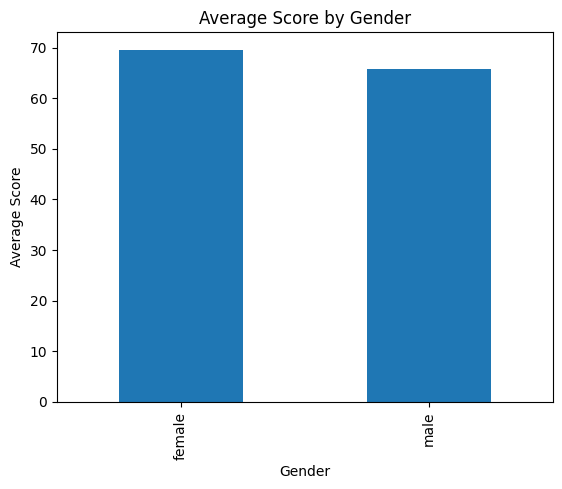

In [14]:
import matplotlib.pyplot as plt

avg_by_gender = df.groupby("gender")["average_score"].mean()

plt.figure()
avg_by_gender.plot(kind="bar")
plt.title("Average Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()


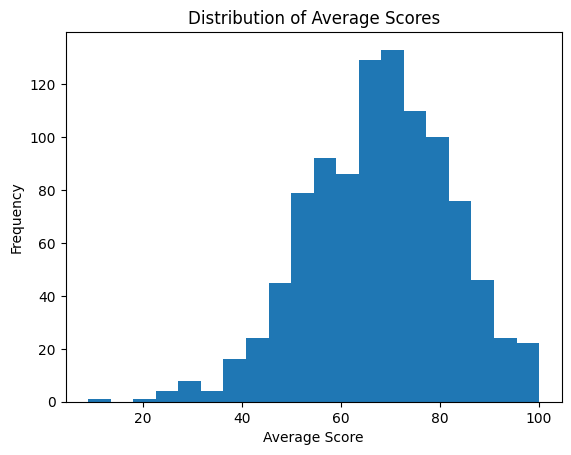

In [15]:
plt.figure()
plt.hist(df["average_score"], bins=20)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()


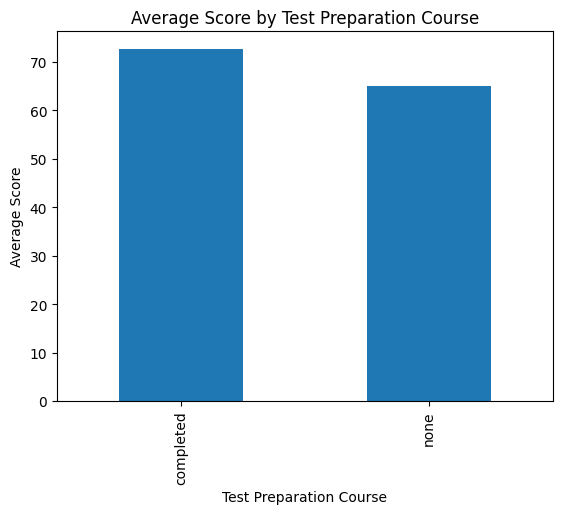

In [16]:
avg_by_prep = df.groupby("test_preparation_course")["average_score"].mean()

plt.figure()
avg_by_prep.plot(kind="bar")
plt.title("Average Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()


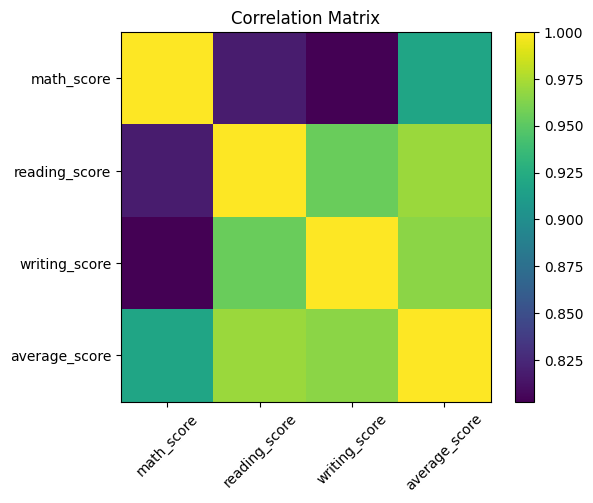

In [17]:
corr = df[["math_score", "reading_score", "writing_score", "average_score"]].corr()

plt.figure()
plt.imshow(corr)
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


In [18]:
from scipy.stats import ttest_ind


In [19]:
completed = df[df["test_preparation_course"] == "completed"]["average_score"]
none = df[df["test_preparation_course"] == "none"]["average_score"]


In [20]:
t_stat, p_value = ttest_ind(completed, none)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 8.390944443482592
P-Value: 1.633780203592351e-16


In [21]:
alpha = 0.05

if p_value < alpha:
    print("Result: Statistically significant difference.")
else:
    print("Result: No statistically significant difference.")


Result: Statistically significant difference.


In [24]:
import sqlite3


In [26]:
conn = sqlite3.connect("students.db")


In [27]:
df.to_sql("students", conn, index=False, if_exists="replace")


1000

In [30]:
query1 = """
SELECT gender, AVG(average_score) AS avg_score
FROM students
GROUP BY gender;
"""

result1 = pd.read_sql(query1, conn)
result1

,gender,avg_score
0,female,69.569498
1,male,65.837483


In [33]:
query2 = """
SELECT test_preparation_course,
       AVG(average_score) AS avg_score
FROM students
GROUP BY test_preparation_course;
"""

result2 = pd.read_sql(query2, conn)
result2


,test_preparation_course,avg_score
0,completed,72.669460
1,none,65.038941


In [34]:
query3 = """
SELECT parental_level_of_education,
       AVG(average_score) AS avg_score
FROM students
GROUP BY parental_level_of_education
ORDER BY avg_score DESC;
"""

result3 = pd.read_sql(query3, conn)
result3


,parental_level_of_education,avg_score
0,master's degree,73.598870
1,bachelor's degree,71.923729
2,associate's degree,69.569069
3,some college,68.476401
4,some high school,65.108007
5,high school,63.096939


In [35]:
query4 = """
SELECT gender, average_score
FROM students
ORDER BY average_score DESC
LIMIT 5;
"""

result4 = pd.read_sql(query4, conn)
result4


,gender,average_score
0,female,100.000000
1,male,100.000000
2,female,100.000000
3,female,99.666667
4,female,99.000000


In [36]:
conn.close()


1. Test Preparation Impact

Students who completed the test preparation course scored approximately 7–8 points higher on average.
T-test confirmed this difference is statistically significant (p < 0.05).

2. Gender Performance Difference

Female students slightly outperform male students on average.

3. Strong Subject Correlation

Reading and writing scores show strong positive correlation (~0.95).

4. Parental Education Effect

Students whose parents have higher education levels tend to perform better academically.

5. Score Distribution

Most students fall within the 55–80 score range, indicating a roughly normal distribut